In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

# Interpretation:
# - `pandas` for data manipulation.
# - `numpy` for numerical operations.
# - `seaborn` for advanced visualizations.
# - `matplotlib` for creating plots.

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\HP\diabetes.csv')

# Displaying the first and last few rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())
print("\nLast 5 rows of the dataset:")
print(df.tail())

# Displaying general information about the dataframe
print("\nDataFrame Information:")
print(df.info())

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Number of unique values in each column
print("\nNumber of Unique Values in Each Column:")
print(df.nunique())


First 5 rows of the dataset:
   slno  gender   age  hypertension heart_disease smoking_history    bmi  \
0     1  Female  80.0           0.0             1           never  25.19   
1     2  Female  54.0           0.0             0         No Info  27.32   
2     3    Male  28.0           0.0             0           never  27.32   
3     4  Female  36.0           0.0             0         current  23.45   
4     5    Male  76.0           1.0             1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  height  weight  
0          6.6                  140       0.0  171.52   74.11  
1          6.6                   80       0.0  176.48   83.74  
2          5.7                  158       0.0  163.29   58.46  
3          5.0                  155       0.0  187.04   52.77  
4          4.8                  155       0.0  154.72   68.39  

Last 5 rows of the dataset:
     slno  gender   age  hypertension heart_disease smoking_history    bmi  \
695   696  Female  62.0

In [3]:
# Identifying Numeric and Categorical Columns
def identify_columns(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()  # Numeric columns
    categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()  # Categorical columns
    print("Numeric Columns:", numeric_cols)
    print("Categorical Columns:", categorical_cols)
identify_columns(df)

# Interpretation:
# - `numeric_cols` will contain columns with numeric data types such as int or float.
# - `categorical_cols` will contain columns with non-numeric types such as object (strings), category, or bool.
# - df.columns gives the column labels of the DataFrame as an Index object, tolist() converts this Index object into a Python list

Numeric Columns: ['slno', 'age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'height', 'weight']
Categorical Columns: ['gender', 'heart_disease', 'smoking_history']



Missing Values in Each Column:
slno                   0
gender                 3
age                    5
hypertension           2
heart_disease          1
smoking_history        5
bmi                    3
HbA1c_level            2
blood_glucose_level    0
diabetes               6
height                 0
weight                 0
dtype: int64

Percentage of Missing Values in Each Column:
slno                   0.000000
gender                 0.428571
age                    0.714286
hypertension           0.285714
heart_disease          0.142857
smoking_history        0.714286
bmi                    0.428571
HbA1c_level            0.285714
blood_glucose_level    0.000000
diabetes               0.857143
height                 0.000000
weight                 0.000000
dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_11124\3984164888.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='pastel')


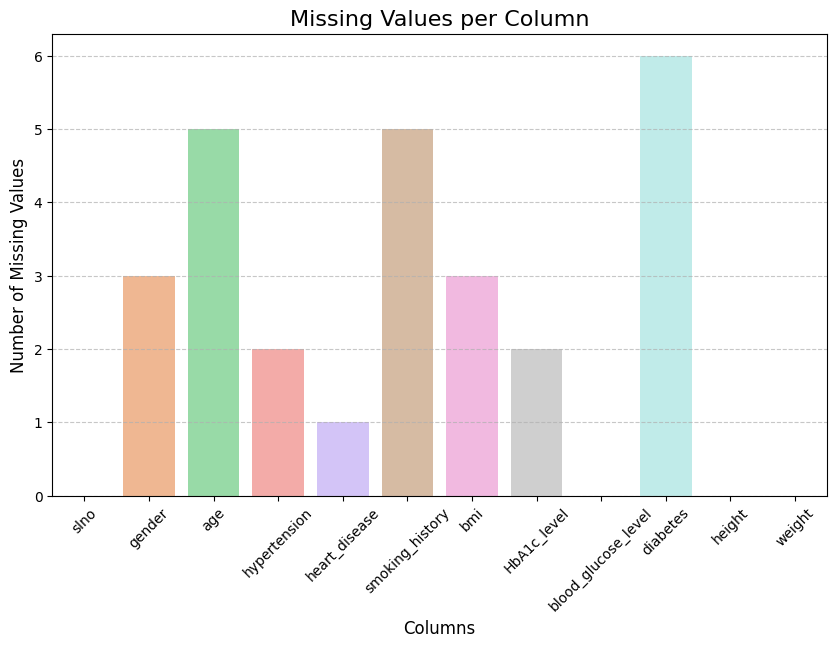

In [4]:
# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
missing_values = df.isnull().sum()
print(missing_values)

# Percentage of missing values in each column
print("\nPercentage of Missing Values in Each Column:")
print((df.isnull().sum() / len(df)) * 100)
# Plot the bar graph for missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='pastel')
plt.title('Missing Values per Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Missing Values After Imputation:
slno                   0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
height                 0
weight                 0
dtype: int64

Updated Rows with Previously Missing Values:
Empty DataFrame
Columns: [slno, gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level, diabetes, height, weight]
Index: []


C:\Users\HP\AppData\Local\Temp\ipykernel_11124\2859764829.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values_after.index, y=missing_values_after.values, palette='pastel')


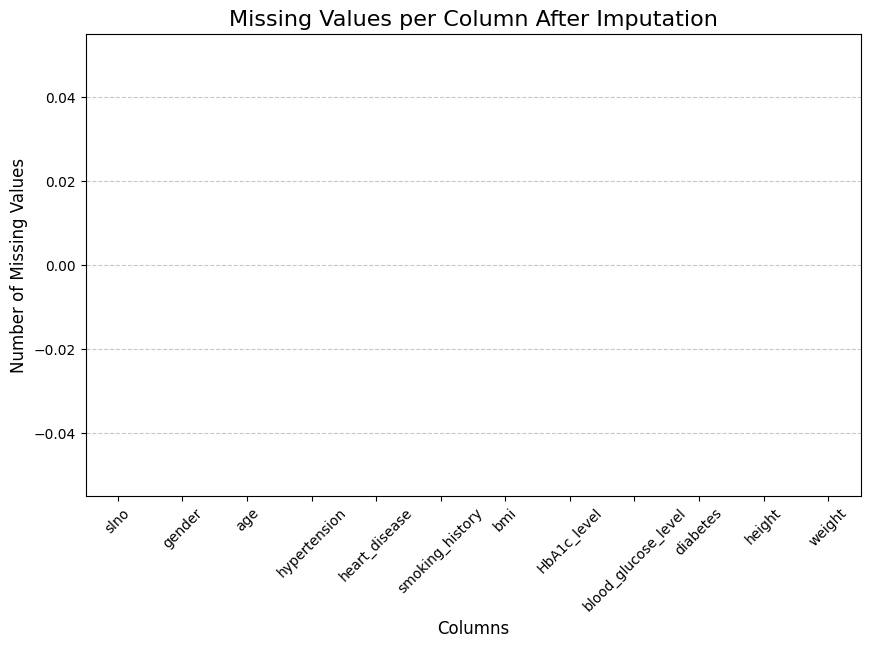

In [5]:
# Impute missing values with the mean for numerical columns and mode for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':  # For categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # For numerical columns
        df[col].fillna(df[col].mean(), inplace=True)

# Display the updated dataset to verify
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

# Show the specific row where imputation occurred
print("\nUpdated Rows with Previously Missing Values:")
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)

missing_values_after = df.isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_after.index, y=missing_values_after.values, palette='pastel')
plt.title('Missing Values per Column After Imputation', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Interpretation:
# - This bar graph shows that no missing values remain after the imputation process.
# - Helps to confirm that the missing values were ha

In [6]:
# Remove the column 'sl.no'
df.drop(columns=['slno'], inplace=True)
print("\nColumns after removing 'sl.no':")
print(df.columns)

# Create new columns: obesity (1 if bmi > 30) and age_HbA1c_ratio
df['obesity'] = np.where(df['bmi'] > 30, 1, 0)  # 1 indicates obese, 0 otherwise
df['age_HbA1c_ratio'] = df['age'] / df['HbA1c_level']
print("\nNew Columns: 'obesity' and 'age_HbA1c_ratio'")
print(df[['obesity', 'age_HbA1c_ratio']].head())


Columns after removing 'sl.no':
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'height',
       'weight'],
      dtype='object')

New Columns: 'obesity' and 'age_HbA1c_ratio'
   obesity  age_HbA1c_ratio
0        0        12.121212
1        0         8.181818
2        0         4.912281
3        0         7.200000
4        0        15.833333


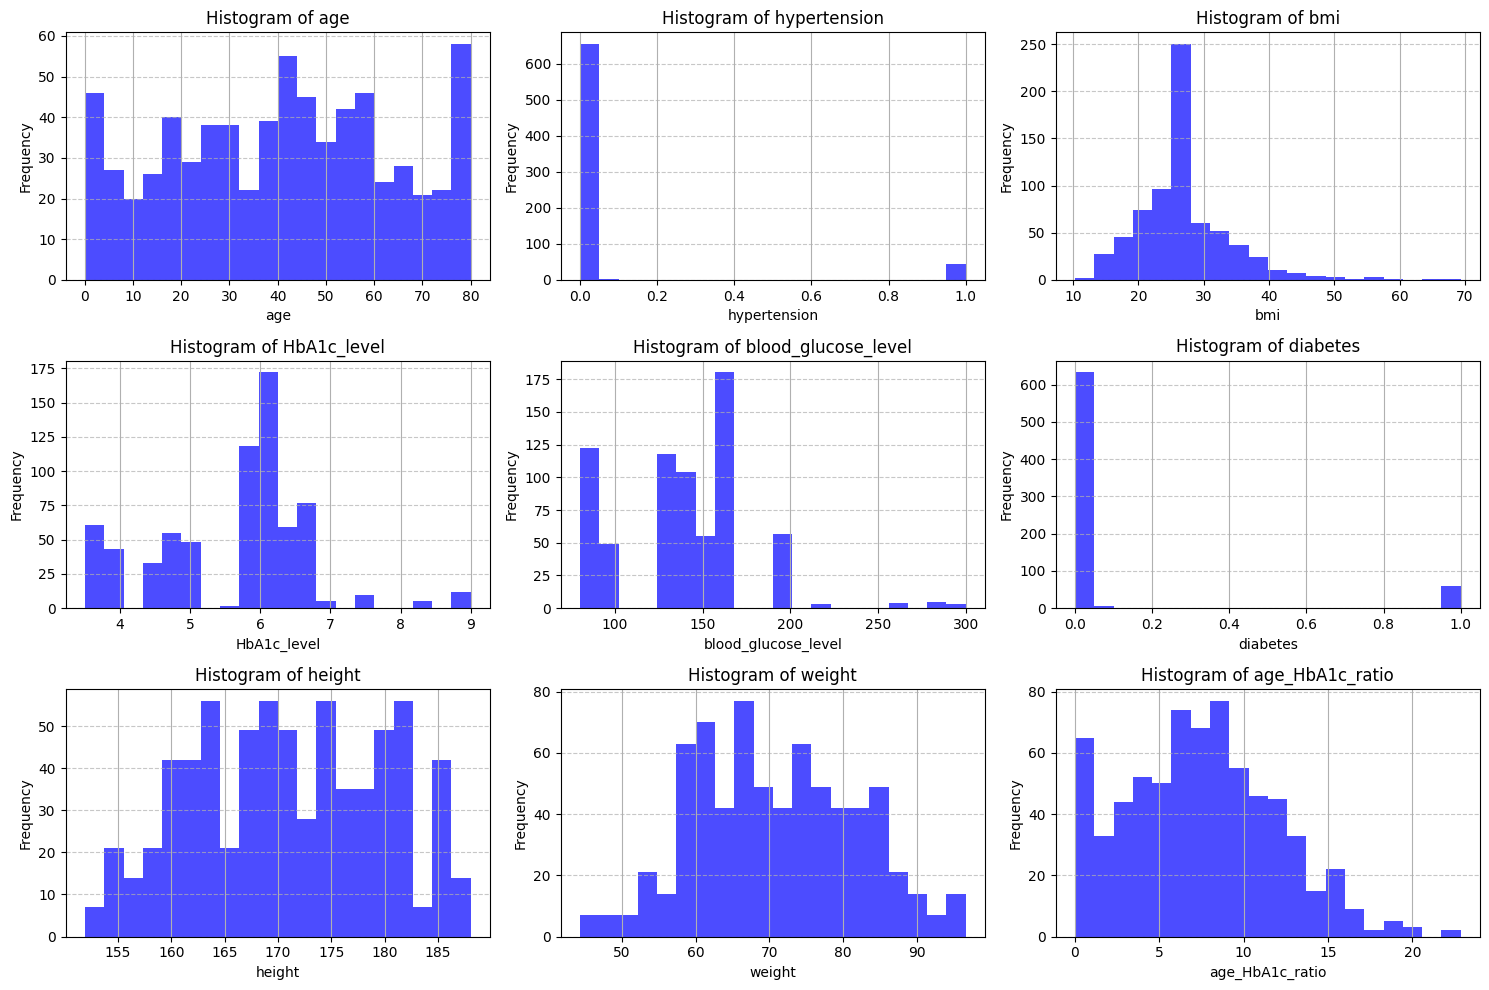

age - Mean: 41.23395683453237, Median: 42.0, Skewness: -0.02136913270389944
age is negatively skewed (Left Skew).

hypertension - Mean: 0.06303724928366762, Median: 0.0, Skewness: 3.608844061495147
hypertension is positively skewed (Right Skew).

bmi - Mean: 27.074131994261116, Median: 27.32, Skewness: 1.301018410101416
bmi is positively skewed (Right Skew).

HbA1c_level - Mean: 5.612177650429799, Median: 5.8, Skewness: -0.09705712845340009
HbA1c_level is negatively skewed (Left Skew).

blood_glucose_level - Mean: 139.7, Median: 145.0, Skewness: 0.6633529898482997
blood_glucose_level is positively skewed (Right Skew).

diabetes - Mean: 0.08789625360230548, Median: 0.0, Skewness: 2.929751102198568
diabetes is positively skewed (Right Skew).

height - Mean: 171.083, Median: 170.87, Skewness: -0.038018583964751856
height is negatively skewed (Left Skew).

weight - Mean: 70.7976, Median: 70.11500000000001, Skewness: 0.1088926179889355
weight is positively skewed (Right Skew).

age_HbA1c_ra

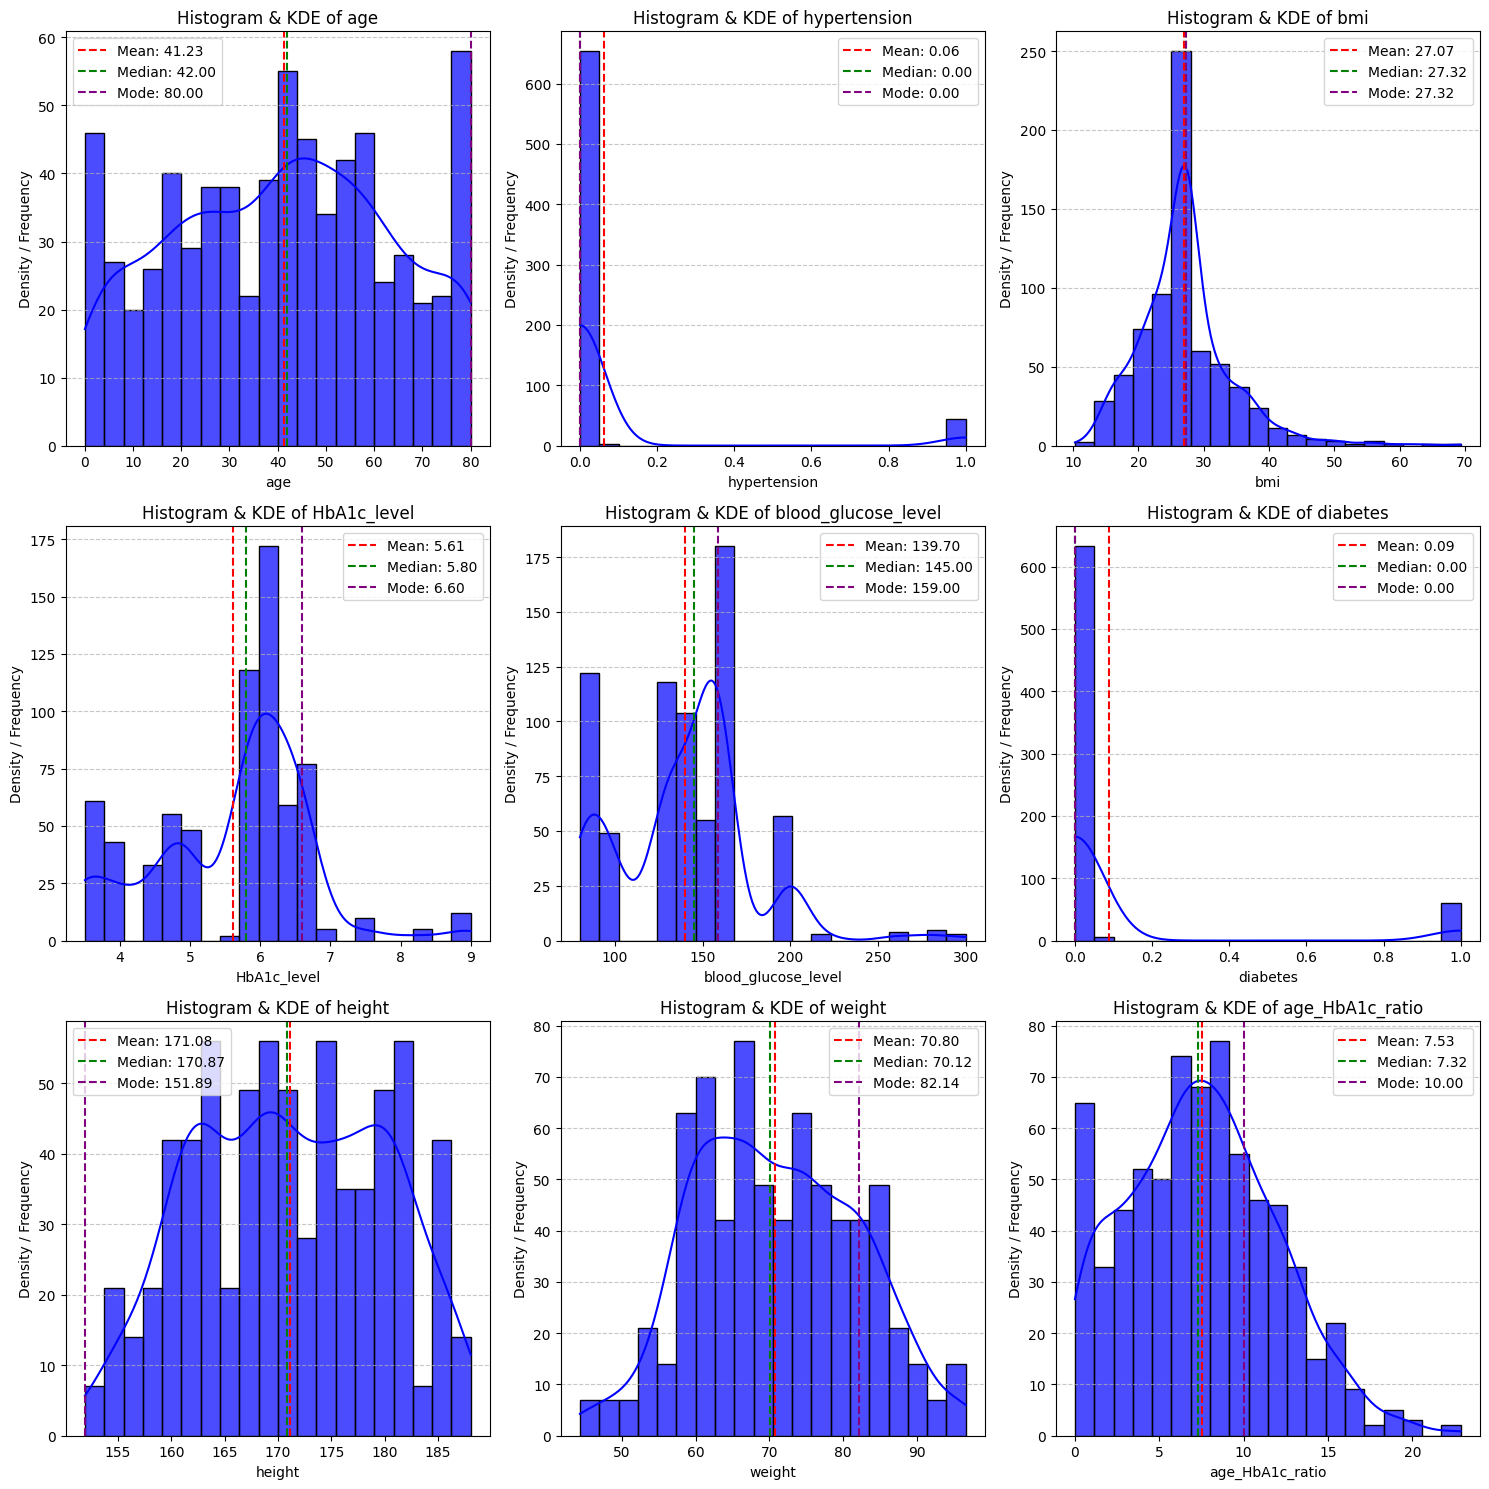

In [7]:
# Univariate Analysis - Histograms for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms for all numerical columns in one figure
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  
    df[column].hist(bins=20, alpha=0.7, color='blue')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



# Get all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
rows = (len(numerical_columns) // 3) + (1 if len(numerical_columns) % 3 != 0 else 0)
cols = min(len(numerical_columns), 3)

# Plot histograms and check skewness for all numerical columns
plt.figure(figsize=(15, rows * 5))
for i, col in enumerate(numerical_columns, 1):
    # Mean, Median, and Skewness Calculation
    mean = df[col].mean()
    median = df[col].median()
    skewness = df[col].skew()

    # Print Mean, Median, and Skewness
    print(f'{col} - Mean: {mean}, Median: {median}, Skewness: {skewness}')

    # Determine skewness type
    if skewness > 0:
        print(f"{col} is positively skewed (Right Skew).\n")
    elif skewness < 0:
        print(f"{col} is negatively skewed (Left Skew).\n")
    else:
        print(f"{col} is symmetric (No Skew).\n")

    # Plot histogram with KDE for better visualization
    plt.subplot(rows, cols, i)  # Dynamically adjusting the grid size
    
    # Plot histogram and KDE
    sns.histplot(df[col], kde=True, bins=20, color='blue', alpha=0.7)
    
    # Add mean, median, and mode lines
    mode_val = df[col].mode()[0]
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    plt.axvline(mode_val, color='purple', linestyle='--', label=f'Mode: {mode_val:.2f}')
    
    # Titles and labels
    plt.title(f"Histogram & KDE of {col}")
    plt.xlabel(col)
    plt.ylabel("Density / Frequency")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11124\1779737255.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_11124\1779737255.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_11124\1779737255.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')


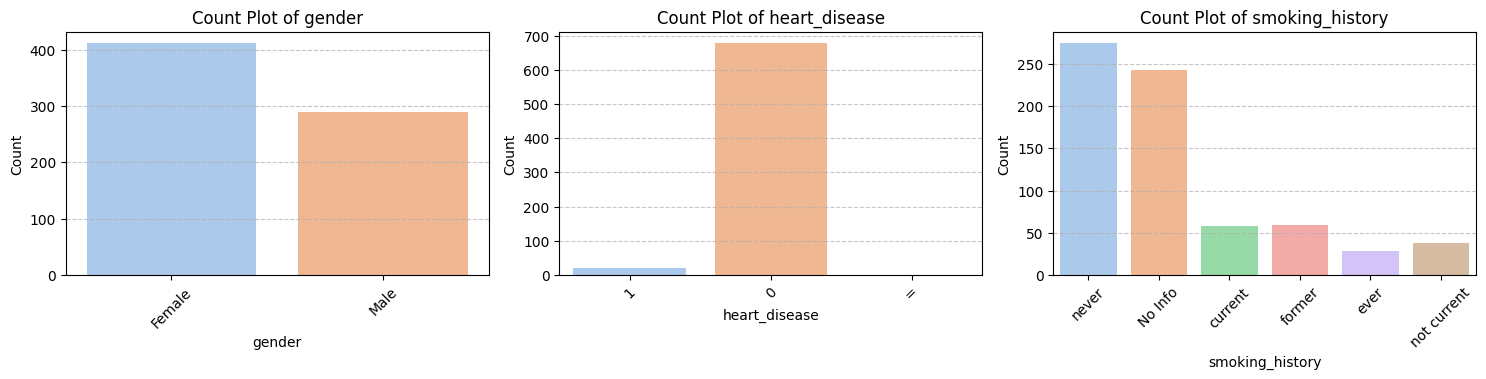

In [8]:
# Univariate Analysis - Count plots for categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns
# Plotting count plots for all categorical columns in one figure
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i) 
    sns.countplot(x=column, data=df, palette='pastel')
    plt.title(f"Count Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

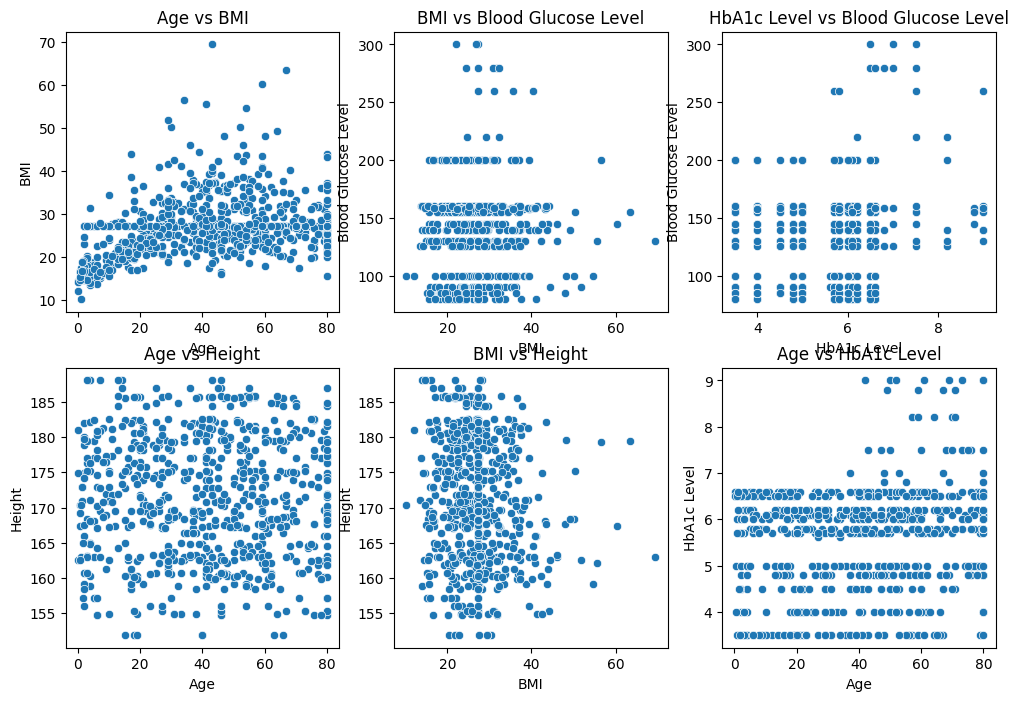

<Figure size 640x480 with 0 Axes>

In [9]:


# Set the size for better visualization
plt.figure(figsize=(12, 8))

# 1. Scatter Plot for Age vs BMI
plt.subplot(2, 3, 1)  # (rows, columns, position)
sns.scatterplot(x='age', y='bmi', data=df)
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')

# 2. Scatter Plot for BMI vs Blood Glucose Level
plt.subplot(2, 3, 2)
sns.scatterplot(x='bmi', y='blood_glucose_level', data=df)
plt.title('BMI vs Blood Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')

# 3. Scatter Plot for HbA1c Level vs Blood Glucose Level
plt.subplot(2, 3, 3)
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', data=df)
plt.title('HbA1c Level vs Blood Glucose Level')
plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')

# 4. Scatter Plot for Age vs Height
plt.subplot(2, 3, 4)
sns.scatterplot(x='age', y='height', data=df)
plt.title('Age vs Height')
plt.xlabel('Age')
plt.ylabel('Height')

# 5. Scatter Plot for BMI vs Height
plt.subplot(2, 3, 5)
sns.scatterplot(x='bmi', y='height', data=df)
plt.title('BMI vs Height')
plt.xlabel('BMI')
plt.ylabel('Height')

# 6. Scatter Plot for Age vs HbA1c Level
plt.subplot(2, 3, 6)
sns.scatterplot(x='age', y='HbA1c_level', data=df)
plt.title('Age vs HbA1c Level')
plt.xlabel('Age')
plt.ylabel('HbA1c Level')

# Adjust layout
plt.show()
plt.tight_layout()

#The scatter plots help in identifying trends, correlations, or lack thereof, between the selected pairs of variables.
#If the data points form a clear linear or non-linear pattern, it could indicate a strong relationship between the variables.
#If the data points are widely spread out with no discernible pattern, it suggests weak or no correlation between the variables.


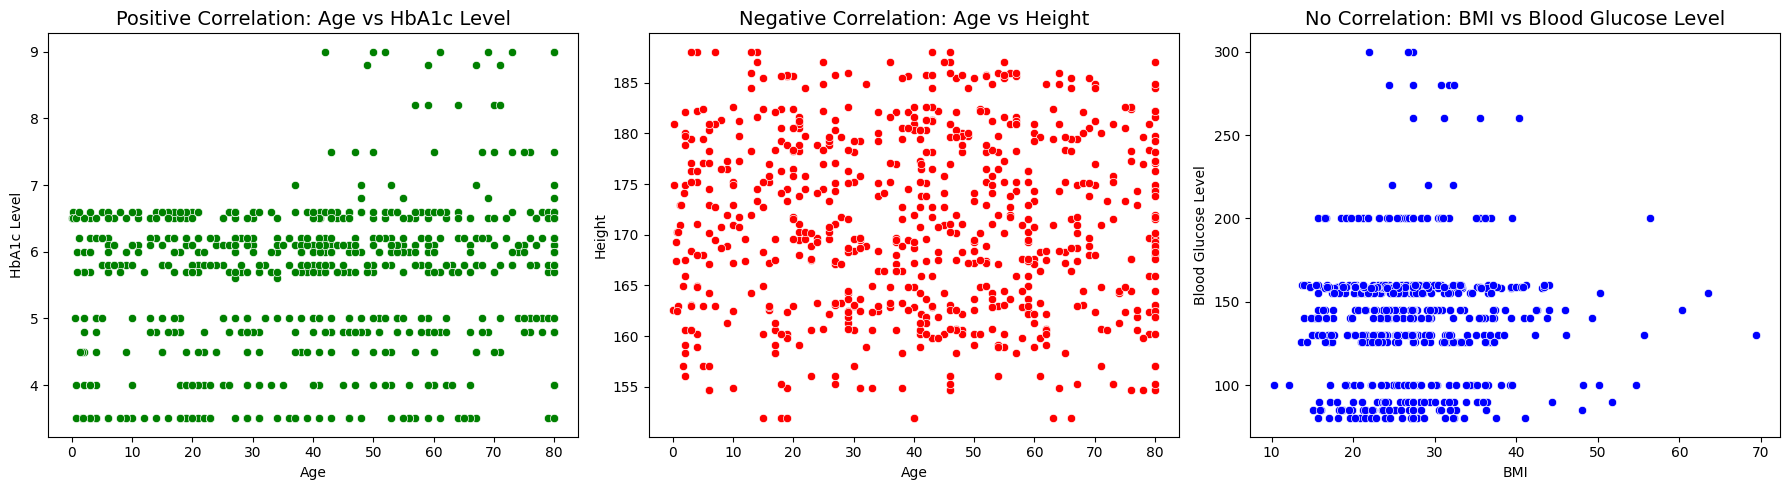

In [10]:
# Positive Correlation (e.g., age vs. HbA1c_level)
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='HbA1c_level', data=df, color='green')
plt.title('Positive Correlation: Age vs HbA1c Level', fontsize=14)
plt.xlabel('Age')
plt.ylabel('HbA1c Level')

# Negative Correlation (e.g., age vs. height)
plt.subplot(1, 3, 2)
sns.scatterplot(x='age', y='height', data=df, color='red')
plt.title('Negative Correlation: Age vs Height', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Height')

# No Correlation (e.g., gender vs. BMI as an example if categorical, but can be extended)
plt.subplot(1, 3, 3)
sns.scatterplot(x='bmi', y='blood_glucose_level', data=df, color='blue')
plt.title('No Correlation: BMI vs Blood Glucose Level', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')

plt.tight_layout()
plt.show()
#positive Correlation: As one variable increases, so does the other (Age and HbA1c).
#Negative Correlation: As one variable increases, the other decreases (Age and Height).
#No Correlation: No clear trend or pattern exists between the two variables (BMI and Blood Glucose Level).

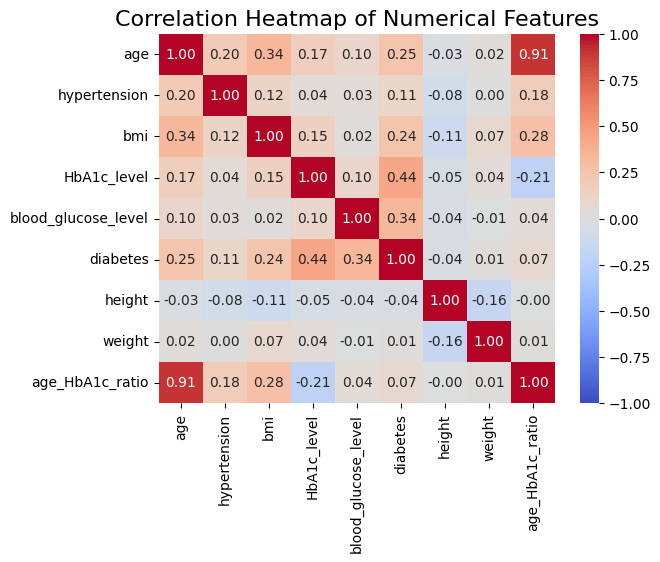

In [11]:
# Correlation heatmap for numerical columns in the dataset
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

# Multivariate - Heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()
#The heatmap will display a grid where each cell represents the correlation between two variables.
    #Positive correlations are highlighted in shades of blue.
    #Negative correlations are in shades of red.
    #A correlation of 0 will be neutral (often white or gray)

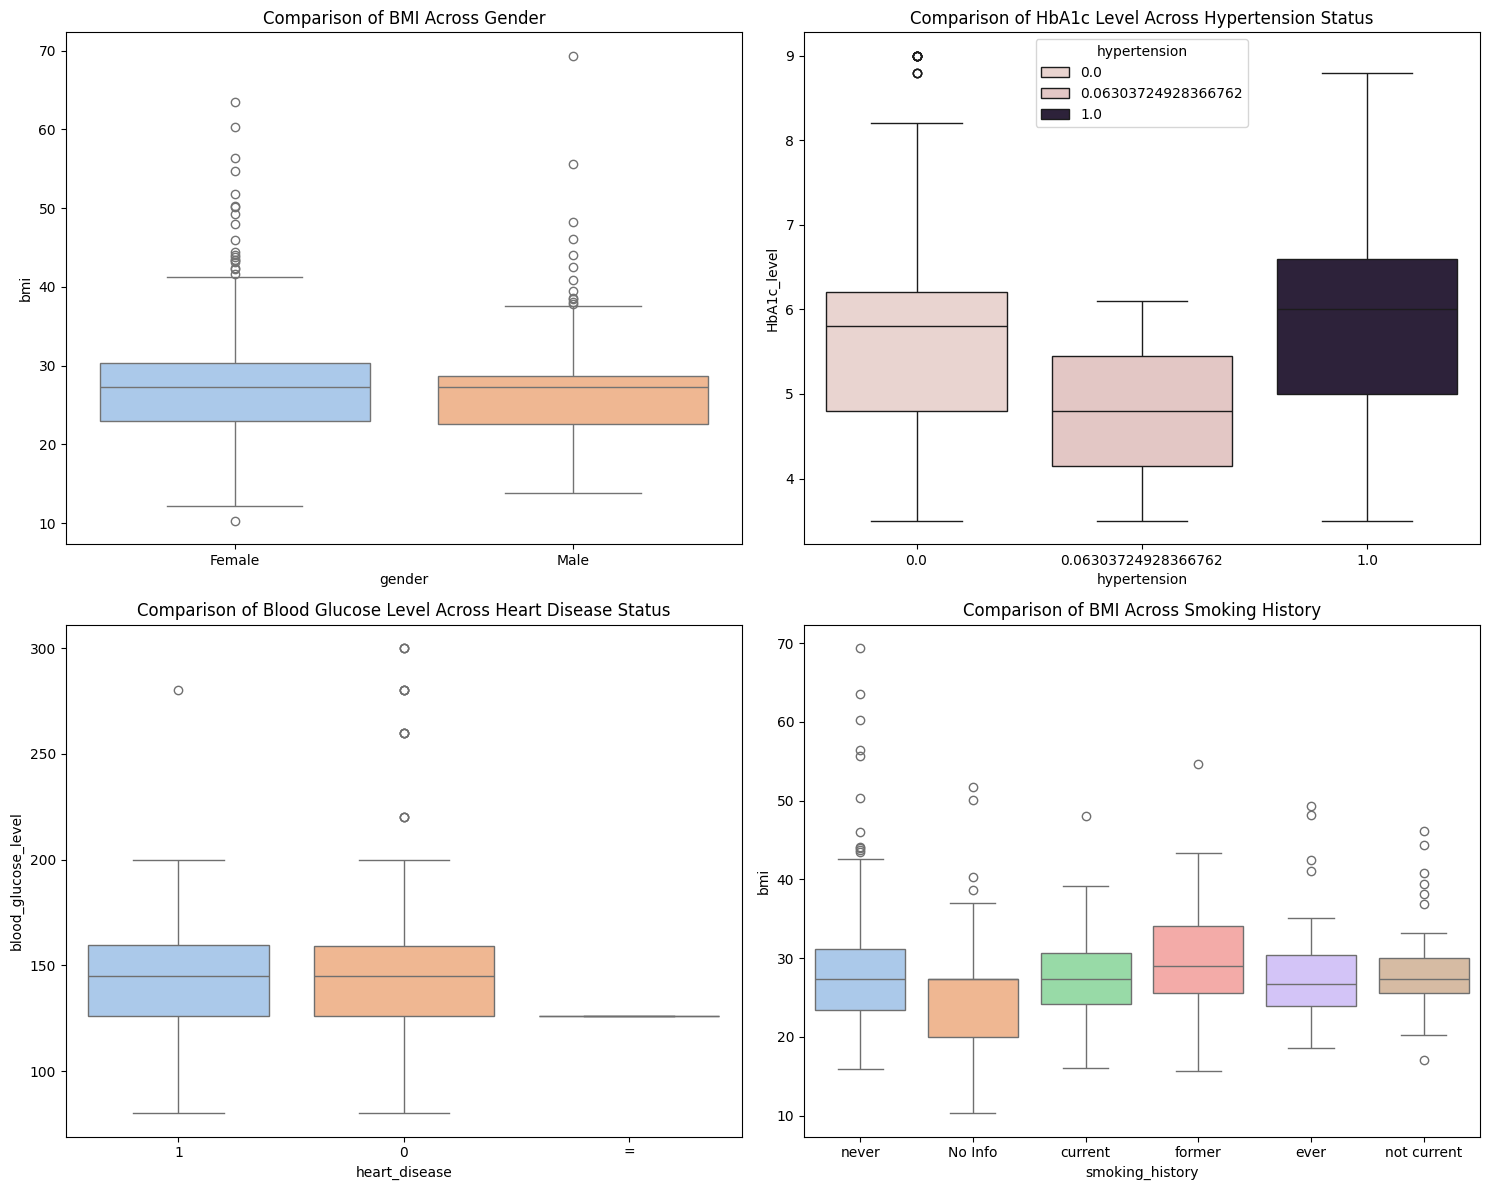

In [12]:
# Set the pastel color palette
sns.set_palette("pastel")

# Create a figure with 2 rows and 2 columns for boxplots
plt.figure(figsize=(15, 12))

# Boxplot 1: Comparison of BMI across Gender
plt.subplot(2, 2, 1)  # (rows, columns, index)
sns.boxplot(x='gender', y='bmi', data=df, hue='gender')
plt.title('Comparison of BMI Across Gender')

# Boxplot 2: Comparison of HbA1c Level across Hypertension status
plt.subplot(2, 2, 2)
sns.boxplot(x='hypertension', y='HbA1c_level', data=df, hue='hypertension')
plt.title('Comparison of HbA1c Level Across Hypertension Status')

# Boxplot 3: Comparison of Blood Glucose Level across Heart Disease status
plt.subplot(2, 2, 3)
sns.boxplot(x='heart_disease', y='blood_glucose_level', data=df, hue='heart_disease')
plt.title('Comparison of Blood Glucose Level Across Heart Disease Status')

# Boxplot 4: Comparison of BMI across Smoking History
plt.subplot(2, 2, 4)
sns.boxplot(x='smoking_history', y='bmi', data=df, hue='smoking_history')
plt.title('Comparison of BMI Across Smoking History')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#Outliers:Dots represent outliers in the boxplot
#Median (Central Line): The line inside the box
#Interquartile Range (IQR): The distance between the 1st quartile (Q1) and 3rd quartile (Q3), which makes up the box
#Whiskers: Lines that extend from the box to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles.


C:\Users\HP\AppData\Local\Temp\ipykernel_11124\3385894689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='bmi', data=df, palette='pastel')


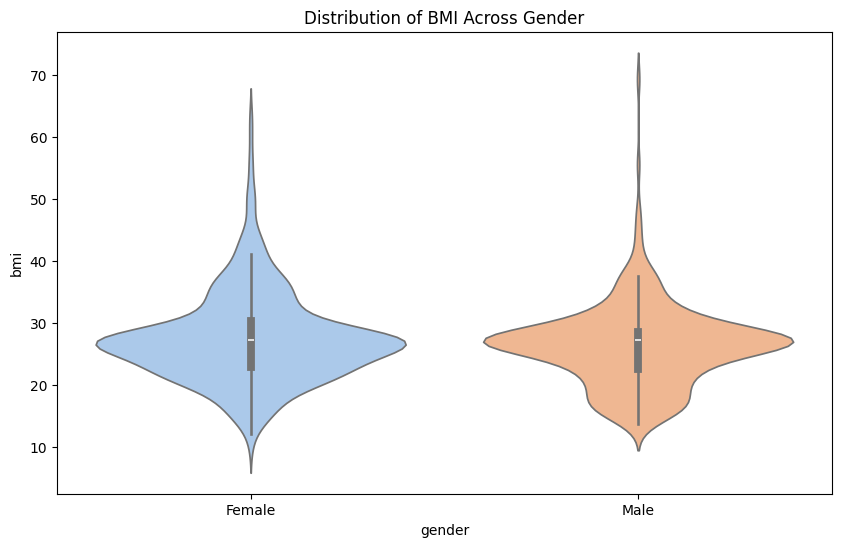

In [13]:
# Violin Plot: Distribution of BMI across Gender
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='bmi', data=df, palette='pastel')
plt.title('Distribution of BMI Across Gender')
plt.show()
#A violin plot is a combination of a boxplot and a kernel density plot, which shows the distribution of the data across different categories

C:\Users\HP\AppData\Local\Temp\ipykernel_11124\1779548558.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='heart_disease', y='blood_glucose_level', data=df, palette='pastel')
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 35.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


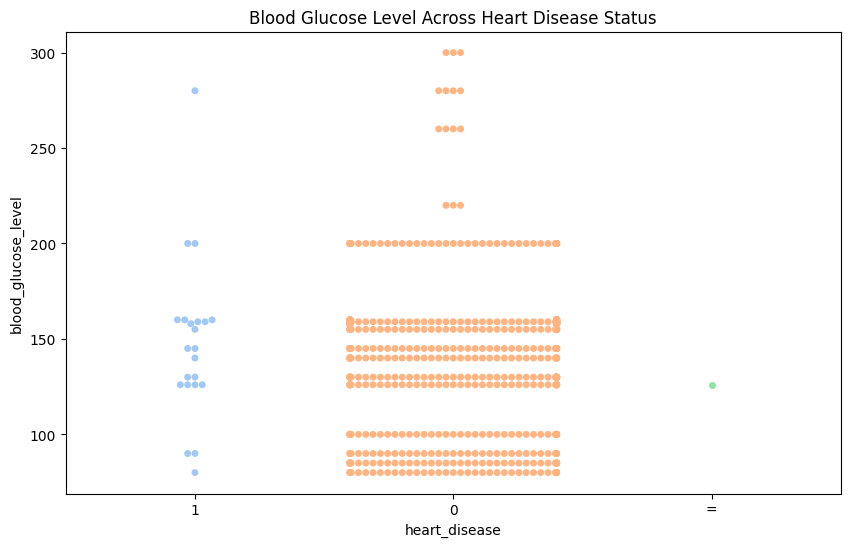

In [14]:
# Swarm Plot: Blood Glucose Level across Heart Disease status
plt.figure(figsize=(10, 6))
sns.swarmplot(x='heart_disease', y='blood_glucose_level', data=df, palette='pastel')
plt.title('Blood Glucose Level Across Heart Disease Status')
plt.show()


In [15]:
#One hot encoding
# Sample data with 'gender' column
data = pd.DataFrame({'gender': ['Female', 'Female', 'Male', 'Female', 'Male', 
                                'Female', 'Female', 'Female', 'Male', 'Female']})
# Create object for one-hot encoding
encoder = ce.OneHotEncoder(cols='gender', handle_unknown='return_nan', return_df=True, use_cat_names=True)

# Original Data
print("Original Data:")
print(data)

# Fit and transform data
data_encoded = encoder.fit_transform(data)

# Encoded Data
print("\nOne-Hot Encoded Data:")
print(data_encoded)


Original Data:
   gender
0  Female
1  Female
2    Male
3  Female
4    Male
5  Female
6  Female
7  Female
8    Male
9  Female

One-Hot Encoded Data:
   gender_Female  gender_Male
0            1.0          0.0
1            1.0          0.0
2            0.0          1.0
3            1.0          0.0
4            0.0          1.0
5            1.0          0.0
6            1.0          0.0
7            1.0          0.0
8            0.0          1.0
9            1.0          0.0


In [16]:
#Dummy encoding

# Sample data with 'gender' column
data = pd.DataFrame({'gender': ['Female', 'Female', 'Male', 'Female', 'Male', 
                                'Female', 'Female', 'Female', 'Male', 'Female']})

# Perform dummy encoding
data_encoded = pd.get_dummies(data=data, columns=['gender'], drop_first=True)
# Convert boolean values to integers
data_encoded = data_encoded.astype(int)

# Encoded Data
print(data_encoded)


   gender_Male
0            0
1            0
2            1
3            0
4            1
5            0
6            0
7            0
8            1
9            0


In [17]:
#Ordinal encoding
train_df = pd.DataFrame({
    'smoking_history': ['no info', 'never', 'not current', 'former', 'current', 'ever', 
                        'former', 'ever', 'never', 'current', 'not current', 'former']
})
# Create OrdinalEncoder object
encoder = ce.OrdinalEncoder(
    cols=['smoking_history'],
    return_df=True,
    mapping=[{
        'col': 'smoking_history',
        'mapping': {'no info': 0, 'never': 1, 'not current': 2, 'former': 3, 'current': 4, 'ever': 5}
    }]
)

# Original data
print("Original Data:")
print(train_df)

# Transform the data
df_train_transformed = encoder.fit_transform(train_df)

# Encoded data
print("\nEncoded Data (Ranked by Risk):")
print(df_train_transformed)


Original Data:
   smoking_history
0          no info
1            never
2      not current
3           former
4          current
5             ever
6           former
7             ever
8            never
9          current
10     not current
11          former

Encoded Data (Ranked by Risk):
    smoking_history
0                 0
1                 1
2                 2
3                 3
4                 4
5                 5
6                 3
7                 5
8                 1
9                 4
10                2
11                3


In [18]:
#Binary encoding
# Create a sample dataframe with a smoking_history variable
df = pd.DataFrame({'smoking_history': ['never', 'current', 'former', 'never', 'former', 'current']})
print(f"Before Encoding the Data:\n\n{df}\n")

# Perform binary encoding on the 'smoking_history' column
smoking_map = {'never': 0, 'current': 1, 'former': 2}
df['smoking_history'] = df['smoking_history'].map(smoking_map)

# Convert the numeric values to binary format
df['smoking_history_binary'] = df['smoking_history'].apply(lambda x: format(x, '03b'))  # 3 bits for 3 categories

# Print the resulting dataframe
print(f"After Encoding the Data:\n\n{df}\n")


Before Encoding the Data:

  smoking_history
0           never
1         current
2          former
3           never
4          former
5         current

After Encoding the Data:

   smoking_history smoking_history_binary
0                0                    000
1                1                    001
2                2                    010
3                0                    000
4                2                    010
5                1                    001



In [19]:
#Count encoding
# Create a sample dataframe with a gender variable
df = pd.DataFrame({'gender': ['Male', 'Male', 'Female', 'Male', 'Male', 'Male']})
print(f"Before Encoding the Data:\n\n{df}\n")

# Perform count encoding on the 'gender' column
counts = df['gender'].value_counts()
df['gender'] = df['gender'].map(counts)

# Print the resulting dataframe
print(f"After Encoding the Data:\n\n{df}\n")


Before Encoding the Data:

   gender
0    Male
1    Male
2  Female
3    Male
4    Male
5    Male

After Encoding the Data:

   gender
0       5
1       5
2       1
3       5
4       5
5       5

